## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
def filter_columns(data,dtype,skip_value = "",print_unwanted = False):
    unwanted_symbols = []
    
    for i in data:
        i = str(i)
        for j in i: 
            
            if j == ".":
                continue

            try:
                int(j)
            except:

                if j not in unwanted_symbols:
                    unwanted_symbols.append(j)
                    
    for i in unwanted_symbols:
        data = data.apply(lambda x: str(x).replace(i,""))
        
        
    data = data.apply(lambda x: 0 if x == "" else x)
            
    if print_unwanted:
        print(unwanted_symbols)
        
        

    return data.astype(dtype)


In [7]:
df['discounted_price'] = filter_columns(df['discounted_price'],'float')

In [8]:
df['actual_price'] = filter_columns(df['actual_price'],'float')

In [9]:
df['discount_percentage'] = filter_columns(df['discount_percentage'],'float')

In [10]:
df['rating'] = filter_columns(df['rating'],'float')

In [11]:
df['rating_count'] = filter_columns(df['rating_count'],'float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [13]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.093788,18270.564505
std,6944.304394,10874.826864,21.635905,0.310598,42729.995315
min,39.000000,39.000000,0.000000,0.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


# EDA

### What is the average rating for each product category?

In [19]:
rating = round(df.groupby('category',as_index = False)[['rating']].mean(),1)
rating

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.8
1,Computers&Accessories|Accessories&Peripherals|...,4.2
2,Computers&Accessories|Accessories&Peripherals|...,3.5
3,Computers&Accessories|Accessories&Peripherals|...,3.6
4,Computers&Accessories|Accessories&Peripherals|...,4.0
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.2
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.2
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.3
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.1


### What are the top rating_count products by category?

In [20]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [22]:
# find the maximum rating_count from each category

max_category_df = df.groupby(['category'],as_index=False)[['rating_count']].max()
max_category_df

,category,rating_count
0,Car&Motorbike|CarAccessories|InteriorAccessori...,1118.0
1,Computers&Accessories|Accessories&Peripherals|...,4426.0
2,Computers&Accessories|Accessories&Peripherals|...,7222.0
3,Computers&Accessories|Accessories&Peripherals|...,14969.0
4,Computers&Accessories|Accessories&Peripherals|...,7352.0
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,5792.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,6199.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,5719.0
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4308.0


In [24]:
# Now we merge our table to find out the top rating product from the category

pd.merge(max_category_df,df,on = ['category','rating_count'],how = 'inner')[['product_name',"category",'rating_count']]

,product_name,category,rating_count
0,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,1118.0
1,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,4426.0
2,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,7222.0
3,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,14969.0
4,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,Computers&Accessories|Accessories&Peripherals|...,7352.0
...,...,...,...
224,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,5792.0
225,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",OfficeProducts|OfficePaperProducts|Paper|Stati...,6199.0
226,Parker Classic Gold Gold Trim Ball Pen,OfficeProducts|OfficePaperProducts|Paper|Stati...,5719.0
227,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts|OfficePaperProducts|Paper|Stati...,4308.0


These all are top rating_products from each and every categories

### How do different percentage discounts contribute to the overall distribution of discounted prices?

In [27]:
labels = ['0 - 20','21 - 40','41 - 60','61 - 80','81 - 95']
bins = [-1,20,40,60,80,95]
df['discounted_range'] = pd.cut(df['discount_percentage'],bins = bins , labels = labels)

(-1, 20] → '0 - 20'

(20, 40] → '21 - 40'

(40, 60] → '41 - 60'

(60, 80] → '61 - 80'

(80, 95] → '81 - 95'

In [31]:
discount_range = (round(df['discounted_range'].value_counts(normalize = True) * 100,2)).reset_index()
discount_range.rename(columns = {"index" : 'Discounted_range',"discounted_range" : "Percentage"},inplace = True)

In [33]:
discount_range

,Percentage,proportion
0,41 - 60,34.68
1,61 - 80,25.94
2,21 - 40,23.07
3,0 - 20,12.29
4,81 - 95,4.03


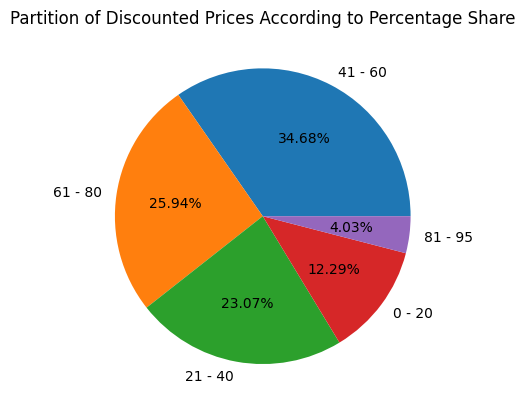

In [34]:
plt.pie(discount_range['proportion'],labels = discount_range['Percentage'],autopct = "%0.2f%%")
plt.title('Partition of Discounted Prices According to Percentage Share')
plt.show()

### What is the distribution of discounted prices vs. actual prices?

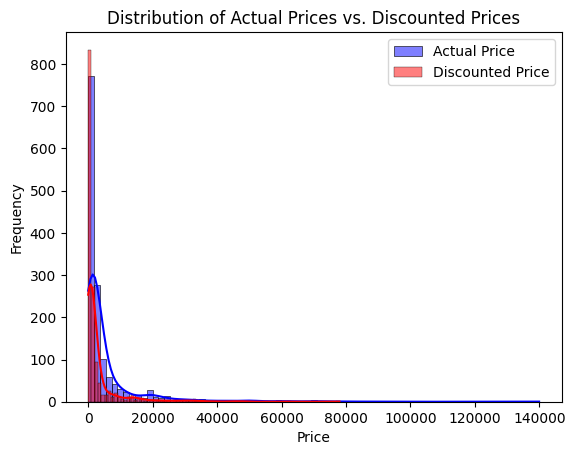

In [35]:
sns.histplot(df['actual_price'], color='blue', kde=True, label='Actual Price')
sns.histplot(df['discounted_price'], color='red', kde=True, label='Discounted Price')
plt.title('Distribution of Actual Prices vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### How does the average discount percentage vary across categories?

In [36]:
categories_with_discounted_range = df.groupby(['category'],as_index = False)[['discounted_range']].max()

In [37]:
categories_with_discounted_range

,category,discounted_range
0,Car&Motorbike|CarAccessories|InteriorAccessori...,41 - 60
1,Computers&Accessories|Accessories&Peripherals|...,81 - 95
2,Computers&Accessories|Accessories&Peripherals|...,21 - 40
3,Computers&Accessories|Accessories&Peripherals|...,41 - 60
4,Computers&Accessories|Accessories&Peripherals|...,41 - 60
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0 - 20
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,0 - 20
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,0 - 20
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,21 - 40


In [38]:
discounted_range_number_of_categories = categories_with_discounted_range['discounted_range'].value_counts().reset_index()

In [39]:
discounted_range_number_of_categories.columns = ['discounted_range','number_of_categories']

In [41]:
discounted_range_number_of_categories

,discounted_range,number_of_categories
0,41 - 60,67
1,61 - 80,67
2,21 - 40,28
3,0 - 20,27
4,81 - 95,22


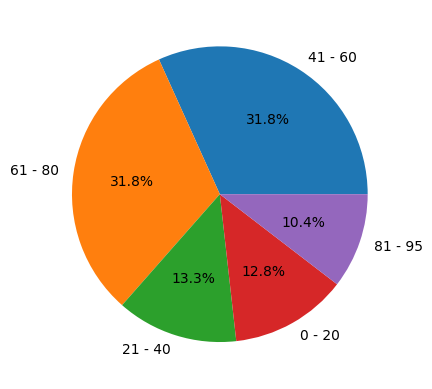

In [48]:
plt.pie(discounted_range_number_of_categories["number_of_categories"],labels = discounted_range_number_of_categories['discounted_range'],autopct="%0.1f%%")
plt.show()

As we saw our popular discounted_range is `41 to 60` and `61 to 80`. Where we sell our more products

### What are the most frequently used keywords in our category?

In [49]:
#pip install wordcloud

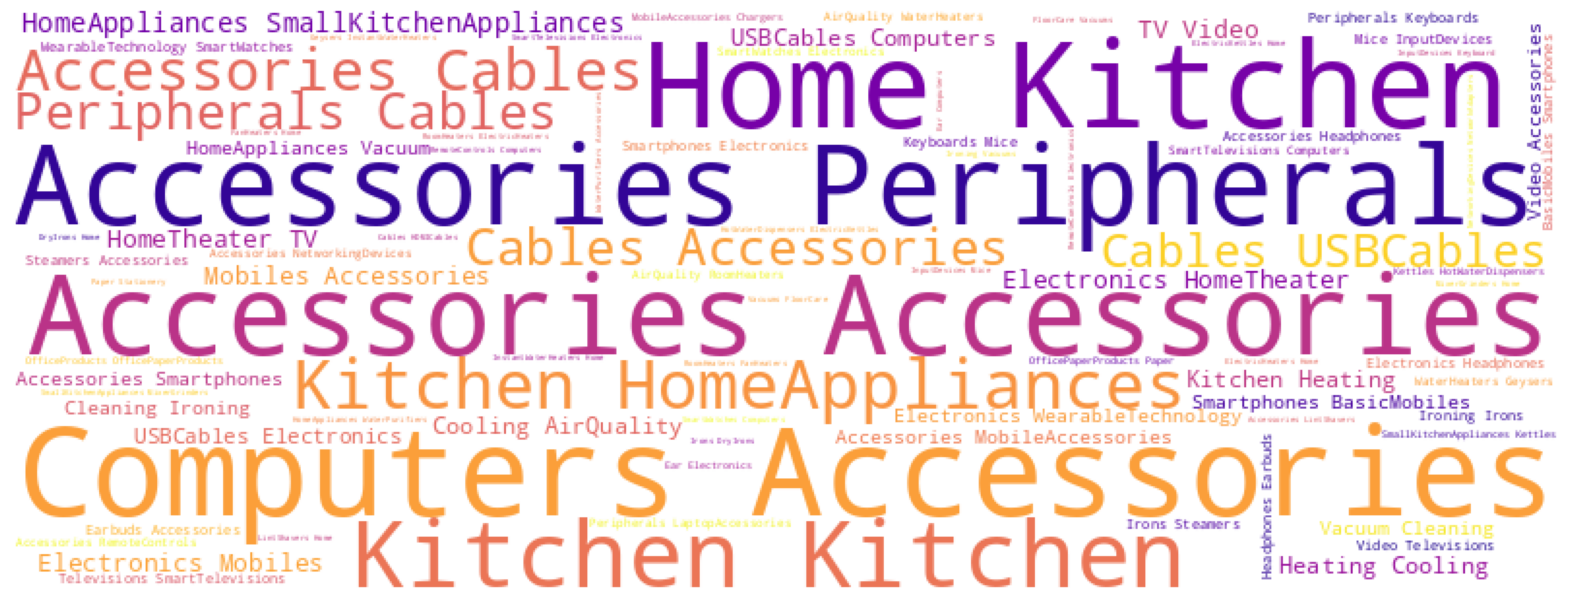

In [53]:
# import wordcloud for creating Word Cloud used keywords in our category?
# import wordcloud for creating Word Cloud
# import STOPWORDS for remove common words into my cloud

from wordcloud import WordCloud,STOPWORDS


all_text = " ".join(df['category'])


plt.figure(figsize = (20,15))
word_cloud = WordCloud(stopwords=STOPWORDS,colormap = 'plasma', width = 800,height = 300,background_color="white")
word_cloud = word_cloud.generate(all_text)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

##### What are the top most popular product names?

In [57]:
most_popular_product = df.groupby(['product_name'],as_index = False)[['rating_count']].sum().sort_values(by = ['rating_count'],ascending = False).head(5)

In [58]:
most_popular_product.reset_index(inplace = True,drop = True)

In [59]:
most_popular_product

,product_name,rating_count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
3,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0


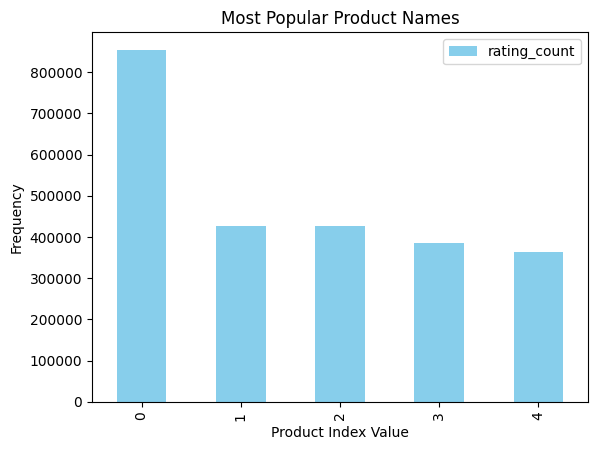

In [60]:
most_popular_product.plot(kind='bar', color='skyblue')

# plt.bar(most_popular_product['product_name'],height = most_popular_product['rating_count'])
plt.title('Most Popular Product Names')
plt.xlabel('Product Index Value')
plt.ylabel('Frequency')
# plt.xticks(rotation=0)
plt.show()

These are the top - 5 most popular product which have highest rating

###  What are the most popular product keywords?

In [63]:
all_product = ' '.join(df['product_name'])

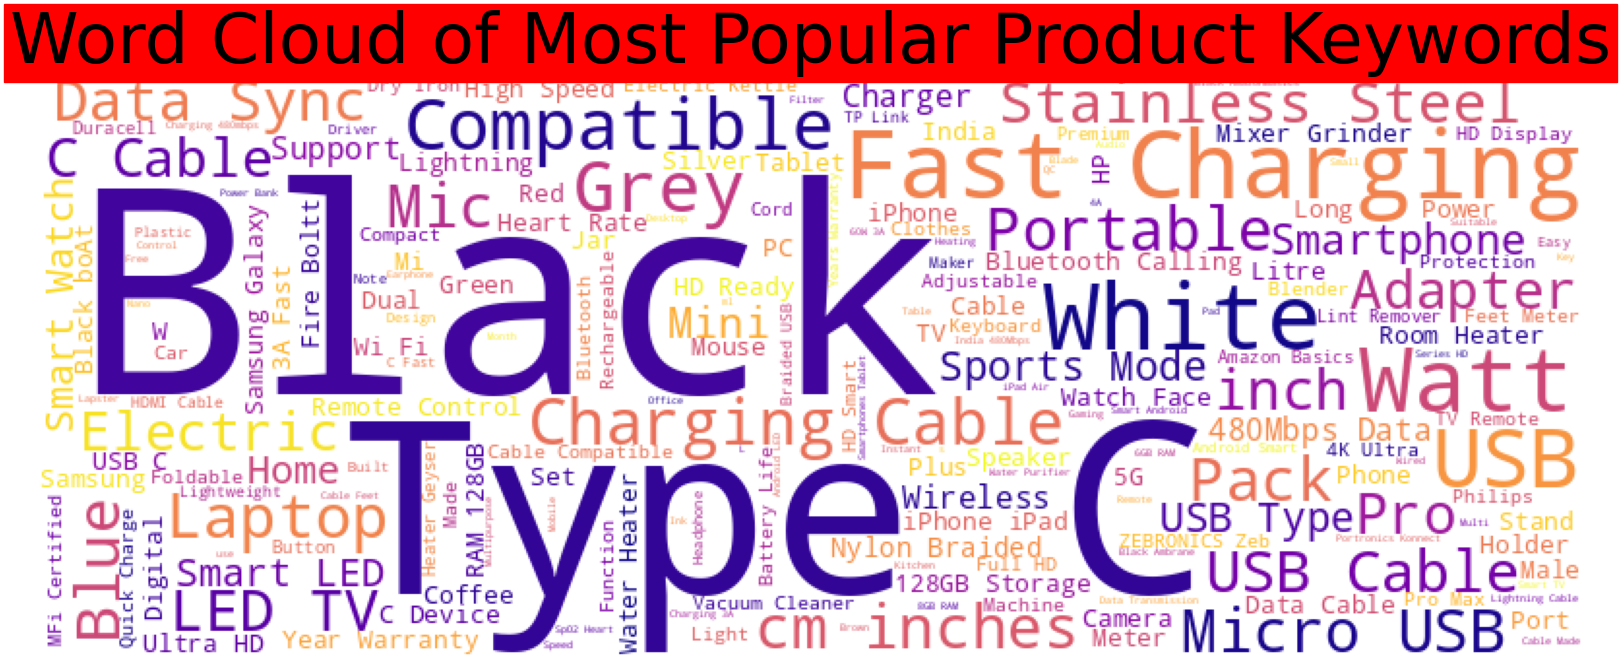

In [64]:
plt.figure(figsize = (20,15))
word_cloud = WordCloud(colormap = 'plasma', width = 800,height = 300,background_color="white").generate(all_product)
print()
plt.imshow(word_cloud)
plt.title('Word Cloud of Most Popular Product Keywords',size = 50,color = 'black',backgroundcolor = 'r')
plt.axis('off')
plt.show()

In [65]:
import warnings
warnings.filterwarnings('ignore')

###  What is the correlation between discounted_price and rating?

In [66]:
df[['discounted_price','rating']].corr()

,discounted_price,rating
discounted_price,1.000000,0.114298
rating,0.114298,1.000000


There is only 12% correlation between the discounted_price and rating

### What are the Top 5 categories based on the highest ratings?

In [67]:
most_popular_category = df.groupby(['category'],as_index = False)[['rating_count']].mean().sort_values(by = ['rating_count'],ascending = False).head(5)

In [68]:
most_popular_category.reset_index(drop = True,inplace = True)

In [69]:
most_popular_category

,category,rating_count
0,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,270563.000000
1,Computers&Accessories|NetworkingDevices|Networ...,95116.000000
2,Electronics|Accessories|MemoryCards|MicroSD,85660.923077
3,"Electronics|Headphones,Earbuds&Accessories|Hea...",80864.211538
4,"Electronics|HomeTheater,TV&Video|Accessories|C...",79418.916667
